In [1]:
#list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)


2.18.0
3.5.0


In [3]:
data=r'/Users/vamsiyarava/Downloads/Major Project/Tumor brain/Training'

In [4]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

In [5]:
images[:20]

['/Users/vamsiyarava/Downloads/Major Project/Tumor brain/Training/.DS_Store',
 '/Users/vamsiyarava/Downloads/Major Project/Tumor brain/Training/pituitary/Tr-pi_0505.jpg',
 '/Users/vamsiyarava/Downloads/Major Project/Tumor brain/Training/pituitary/Tr-pi_0263.jpg',
 '/Users/vamsiyarava/Downloads/Major Project/Tumor brain/Training/pituitary/Tr-pi_0277.jpg',
 '/Users/vamsiyarava/Downloads/Major Project/Tumor brain/Training/pituitary/Tr-pi_1169.jpg',
 '/Users/vamsiyarava/Downloads/Major Project/Tumor brain/Training/pituitary/Tr-pi_0511.jpg',
 '/Users/vamsiyarava/Downloads/Major Project/Tumor brain/Training/pituitary/Tr-pi_0539.jpg',
 '/Users/vamsiyarava/Downloads/Major Project/Tumor brain/Training/pituitary/Tr-pi_1141.jpg',
 '/Users/vamsiyarava/Downloads/Major Project/Tumor brain/Training/pituitary/Tr-pi_1155.jpg',
 '/Users/vamsiyarava/Downloads/Major Project/Tumor brain/Training/pituitary/Tr-pi_1182.jpg',
 '/Users/vamsiyarava/Downloads/Major Project/Tumor brain/Training/pituitary/Tr-pi_119

In [6]:
len(images)

5713

In [7]:
class_values = []
for i in images:
    j = i.split('/')
    class_values.append(j[-2])

In [8]:
class_values[:10]

['Training',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary']

In [9]:
len(class_values)

5713

In [10]:
temp = list(zip(images,class_values))
random.shuffle(temp)
images, class_values = zip(*temp)
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'Class_label'])

In [11]:
data

,image_path,Class_label
0,/Users/vamsiyarava/Downloads/Major Project/Tum...,notumor
1,/Users/vamsiyarava/Downloads/Major Project/Tum...,notumor
2,/Users/vamsiyarava/Downloads/Major Project/Tum...,notumor
3,/Users/vamsiyarava/Downloads/Major Project/Tum...,notumor
4,/Users/vamsiyarava/Downloads/Major Project/Tum...,pituitary
...,...,...
5708,/Users/vamsiyarava/Downloads/Major Project/Tum...,notumor
5709,/Users/vamsiyarava/Downloads/Major Project/Tum...,notumor
5710,/Users/vamsiyarava/Downloads/Major Project/Tum...,meningioma
5711,/Users/vamsiyarava/Downloads/Major Project/Tum...,notumor


In [12]:
data.shape

(5713, 2)

In [13]:
data.Class_label.value_counts()

Class_label
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Training         1
Name: count, dtype: int64

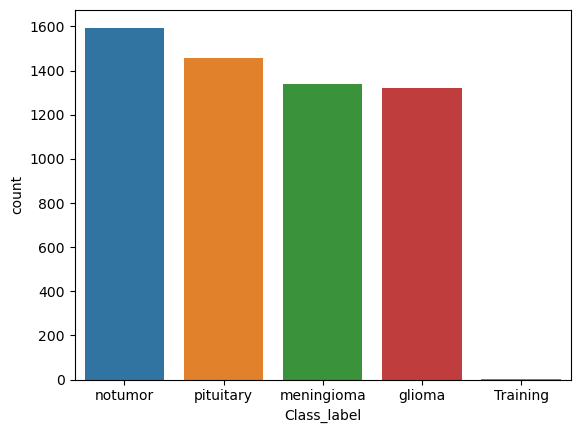

In [14]:
sns.countplot(x = data.Class_label, data = data)
plt.show()

In [18]:
from sklearn.utils import resample
# Separate majority and minority classes
df_c0 = data[data['Class_label']== 'pituitary']
df_c1 = data[data['Class_label']== 'glioma']
df_c2 = data[data['Class_label']== 'meningioma']
df_c3 = data[data['Class_label']== 'notumor']

# Downsample majority class
df_c0_upsampled = resample(df_c0, replace=True,  n_samples = 1000,random_state=23)
df_c1_upsampled = resample(df_c1, replace=True,  n_samples = 1000,random_state=23)
df_c2_upsampled = resample(df_c2, replace=True,  n_samples = 1000,random_state=23)
df_c3_upsampled = resample(df_c3, replace=True,  n_samples = 1000,random_state=23)

# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_c0_upsampled,df_c1_upsampled,df_c2_upsampled,df_c3_upsampled])

# Display new class counts
df_upsampled['Class_label'].value_counts()

Class_label
pituitary     1000
glioma        1000
meningioma    1000
notumor       1000
Name: count, dtype: int64

Text(0.5, 0, 'Class_label')

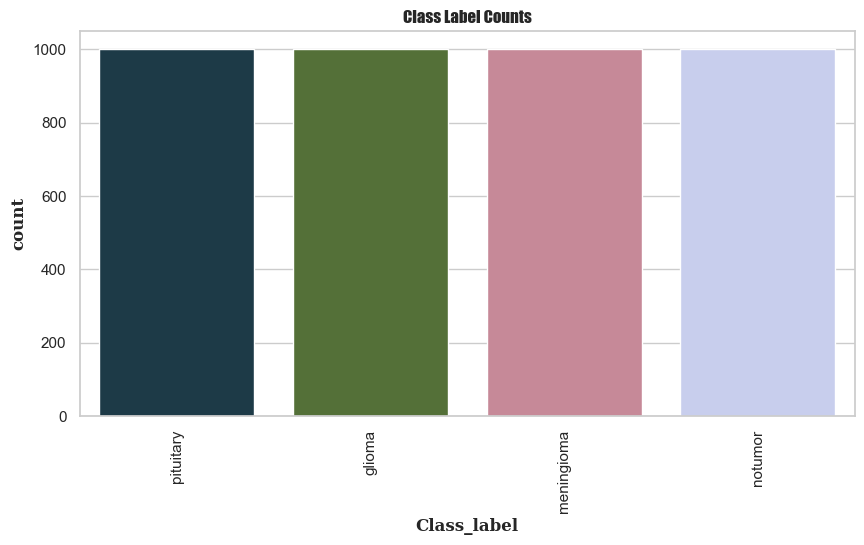

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Class_label", data=df_upsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [20]:
df = df_upsampled.sample(frac=1)
df.head()

,image_path,Class_label
5150,/Users/vamsiyarava/Downloads/Major Project/Tum...,notumor
2871,/Users/vamsiyarava/Downloads/Major Project/Tum...,glioma
4686,/Users/vamsiyarava/Downloads/Major Project/Tum...,notumor
320,/Users/vamsiyarava/Downloads/Major Project/Tum...,meningioma
2105,/Users/vamsiyarava/Downloads/Major Project/Tum...,pituitary


In [21]:
df['Class_label'].value_counts()

Class_label
notumor       1000
glioma        1000
meningioma    1000
pituitary     1000
Name: count, dtype: int64

In [22]:
import os
from PIL import Image

In [23]:
def resize_images(img):
  file = Image.open(img)
  img = file.convert('RGB')
  img_bgr= img.resize((224, 224))
  img_bgr = np.array(img_bgr)
  return img_bgr

In [24]:
#save resized images into images.
images = [resize_images(img) for img in df['image_path']]

In [25]:
images

[array([[[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]],
 
        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]],
 
        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]],
 
        ...,
 
        [[4, 4, 4],
         [4, 4, 4],
         [4, 4, 4],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [26]:
# print number of classes in our dataset
num_classes = len(np.unique(data['Class_label']))

In [27]:
num_classes

5

In [28]:
# save the class into class_names
class_names = list(data['Class_label'])

In [29]:
# Print the shape of the image
images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'pituitary')

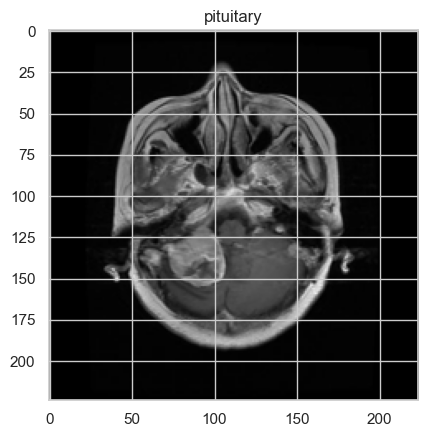

In [30]:
#See the image with class label
plt.imshow(images[33])
plt.title(class_names[33])

Text(0.5, 1.0, 'glioma')

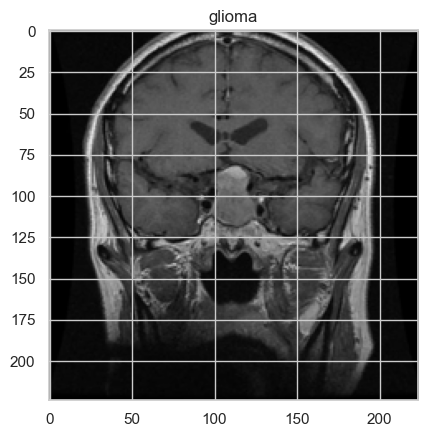

In [31]:
#See the image with class label
plt.imshow(images[70])
plt.title(class_names[70])

Text(0.5, 1.0, 'pituitary')

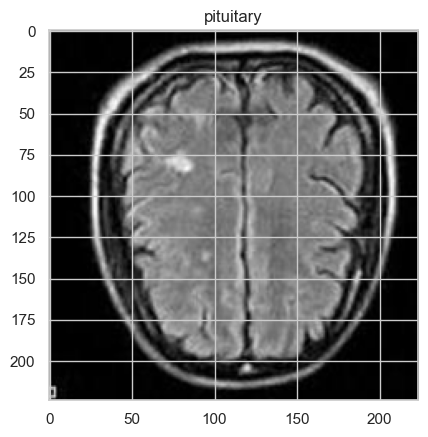

In [32]:
#See the image with class label
plt.imshow(images[5])
plt.title(class_names[515])

In [33]:
# Convert the images into array
images =  np.array(images)

In [34]:
# Shape of the images
images.shape

(4000, 224, 224, 3)

In [35]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(df['Class_label'])

In [36]:
y[:10]

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [37]:
y.shape

(4000, 4)

In [38]:
enc.classes_

array(['glioma', 'meningioma', 'notumor', 'pituitary'], dtype='<U10')

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=42)

In [40]:
X_train.shape

(2800, 224, 224, 3)

In [41]:
X_test.shape

(1200, 224, 224, 3)

In [47]:
# import the vgg16 model
from keras.applications.vgg19 import VGG19

In [48]:
vgg1=VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [49]:
vgg1.trainable=False

In [50]:
# Set the vgg16 model
model_2=Sequential()
model_2.add(vgg1)
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(4, activation='softmax'))
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,236,292 (88.64 MB)

 Trainable params: 3,211,908 (12.25 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [51]:
#Compile the model
model_2.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ["accuracy"])

In [52]:
#Fit the data or train the model
History_2 = model_2.fit(X_train, y_train, epochs = 5, validation_data = (X_test,y_test),batch_size = 128)

Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 621s 29s/step - accuracy: 0.5608 - loss: 6.3086 - val_accuracy: 0.8925 - val_loss: 0.4603
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 650s 30s/step - accuracy: 0.9002 - loss: 0.3466 - val_accuracy: 0.9158 - val_loss: 0.1717
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 640s 29s/step - accuracy: 0.9319 - loss: 0.1188 - val_accuracy: 0.9375 - val_loss: 0.1256
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 683s 32s/step - accuracy: 0.9573 - loss: 0.0688 - val_accuracy: 0.9450 - val_loss: 0.1161
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 653s 30s/step - accuracy: 0.9749 - loss: 0.0465 - val_accuracy: 0.9467 - val_loss: 0.1096


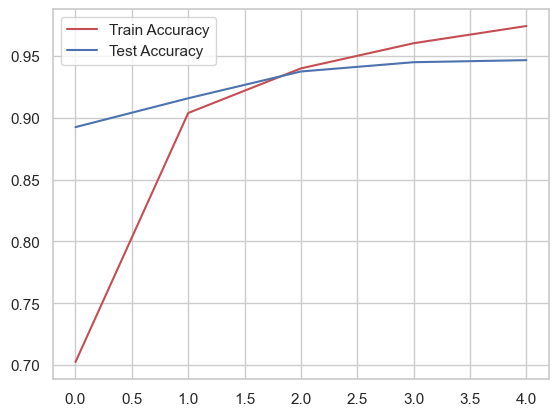

In [53]:
# plot the accuracy plot
plt.plot(History_2.history['accuracy'], 'r')
plt.plot(History_2.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'}) 
plt.show()

In [54]:
# print the test accuracy
score_2 = model_2.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])

Test accuracy: 0.9466666579246521


38/38 ━━━━━━━━━━━━━━━━━━━━ 177s 5s/step


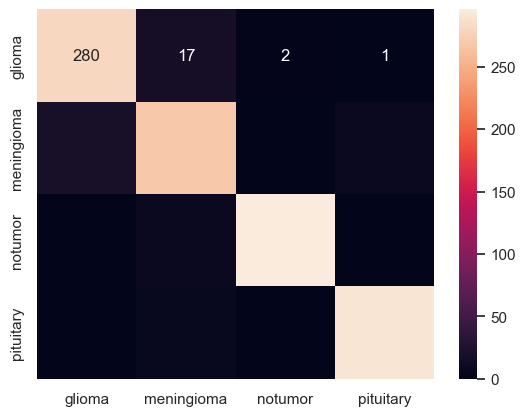

In [55]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_2.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [56]:
tf.keras.models.save_model(model_2,"vgg.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Predicted class: glioma
Actual class: glioma


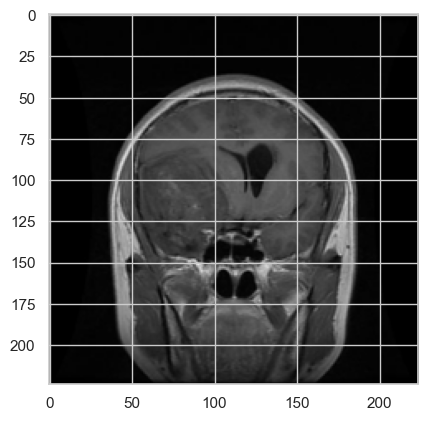

In [57]:
i = 4
pred = np.argmax(model_2.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Predicted class: pituitary
Actual class: pituitary


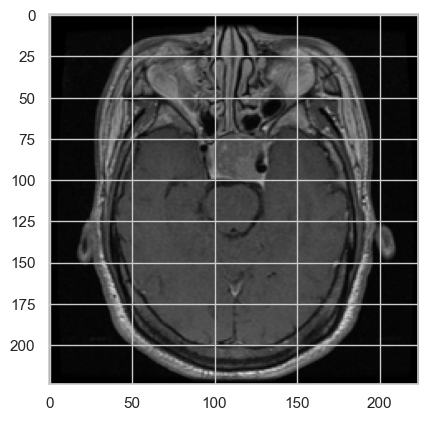

In [58]:
i = 404
pred = np.argmax(model_2.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test[i])

In [59]:
from tensorflow.keras.applications import MobileNet

In [60]:
mob = MobileNet(weights='imagenet',include_top=False,input_shape=(224,224,3))

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


In [61]:
mob.trainable=False

In [62]:
model_mob=Sequential()
model_mob.add(mob)
model_mob.add(Flatten())
model_mob.add(Dense(128, activation='relu'))
model_mob.add(Dropout(0.2))
model_mob.add(Dense(4, activation='softmax'))

In [67]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

# Define the optimizers with the correct parameter name
opt = Adam(learning_rate=0.001)

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

# Define the loss
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)

# Compile the model
model_mob.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])


In [69]:
#Compile the model
opt = Adam(learning_rate=0.001)

optimizer =RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)

model_mob.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [70]:
#Fit the data or train the model
History_mob = model_mob.fit(X_train, y_train, epochs = 5, validation_data = (X_test,y_test),batch_size = 120)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4993 - loss: 45.1296 - val_accuracy: 0.8400 - val_loss: 0.6420
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8199 - loss: 0.6608 - val_accuracy: 0.6100 - val_loss: 2.1593
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7154 - loss: 1.4763 - val_accuracy: 0.7442 - val_loss: 0.7143
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7806 - loss: 0.6491 - val_accuracy: 0.8600 - val_loss: 0.4829
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8399 - loss: 0.5485 - val_accuracy: 0.7492 - val_loss: 0.8782


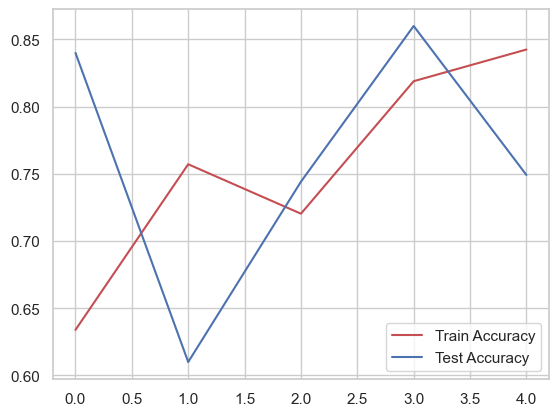

In [71]:
# plot the accuracy plot
plt.plot(History_mob.history['accuracy'], 'r')
plt.plot(History_mob.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 224ms/step


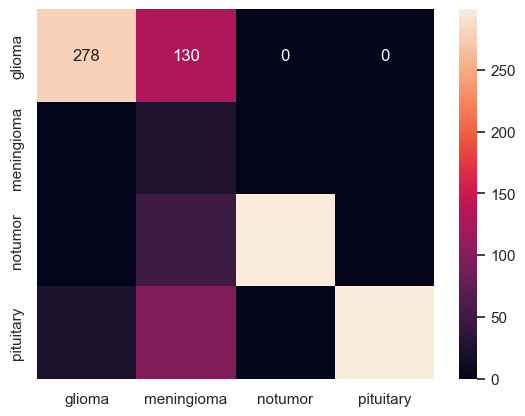

In [72]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_mob.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [73]:
tf.keras.models.save_model(model_mob,"mob.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: notumor
Actual class: notumor


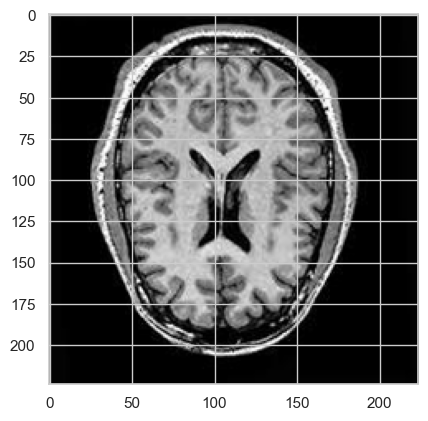

In [76]:
i = 25
pred = np.argmax(model_mob.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test[i])